<a href="https://colab.research.google.com/github/Towhid-Alam/Big-Data/blob/main/17_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = load_diabetes()
X = df.data
y= df.target
X.shape

(442, 10)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Linear Regression

In [4]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [5]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167
R2 score 0.4399338661568968
RMSE 55.627840795469155


# Ridge (L2)

In [6]:
# Ridge
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)


In [7]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[   6.64373321 -172.23747375  485.52958514  314.67584612  -72.94020918
  -80.58868817 -174.46352722   83.61470987  484.36531622   73.58509056]
151.92546856900984
R2 score 0.45199494197195456
RMSE 55.02560551161431


# Lasso (L1)

In [8]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [9]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[  -1.35972089 -192.93718018  526.35651446  332.6411011  -430.22697505
  191.29547987  -44.03491271   68.98898658  688.39602778   47.94061621]
151.87686450031345
R2 score 0.44111855963110613
RMSE 55.568975580213966


# ElasticNet

In [10]:
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4531474541554823

In [11]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[  12.94146674 -150.63182716  454.70979985  297.41151019  -40.62996867
  -82.61311124 -175.79746592   88.72693272  438.79775539   81.84968777]
151.92650042509422
R2 score 0.4531474541554823
RMSE 54.96771274361177


# Polynomial Ridge Regression

In [12]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

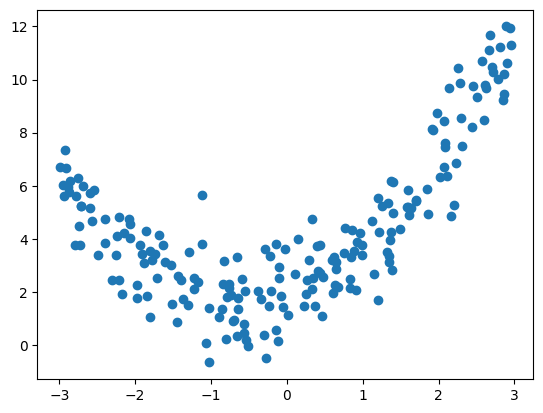

In [13]:
plt.scatter(X, y)
plt.show()

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
#polynomial transformation

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=16,include_bias=True) #hyperparameter is degree

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [16]:
# Applying Polynomial Linear Regression
lr1 = Ridge(alpha=200)
lr1.fit(X_train_trans,y_train)
y_pred = lr1.predict(X_test_trans)


In [17]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8384223182100307
RMSE 1.1307590324528618


In [18]:
lr2 = Ridge(alpha=2)
lr2.fit(X_train_trans,y_train)
y_pred = lr2.predict(X_test_trans)

In [19]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8429716508770876
RMSE 1.114726720679978


In [20]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new1 = lr1.predict(X_new_poly)
y_new2 = lr2.predict(X_new_poly)

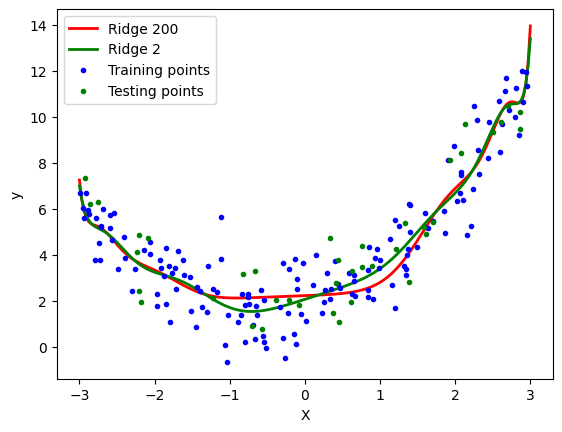

In [21]:
plt.plot(X_new, y_new1, "r-", linewidth=2, label="Ridge 200")
plt.plot(X_new, y_new2, "g-", linewidth=2, label="Ridge 2")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()